In [14]:
import pandas as pd
from pathlib import Path

# === 2. Setup Paths ===
# Absolute path to your project
base_dir = Path(r"F:\Python\Projects\Elevvo Pathways\time_series_retail_sales")
data_dir = base_dir / "data" / "raw"

# Load datasets
features = pd.read_csv(data_dir / "features.csv")
stores = pd.read_csv(data_dir / "stores.csv")
train = pd.read_csv(data_dir / "train.csv")
test = pd.read_csv(data_dir / "test.csv")

# === 3. Basic Info ===
print("Features:", features.shape)
print("Stores:", stores.shape)
print("Train:", train.shape)
print("Test:", test.shape)

# Preview
display(features.head())
display(stores.head())
display(train.head())
display(test.head())

# Check dtypes & missing values
print("\n--- Info ---")
print("Features:"); print(features.info()); print()
print("Stores:"); print(stores.info()); print()
print("Train:"); print(train.info()); print()
print("Test:"); print(test.info()); print()

print("\n--- Missing Values ---")
print("Features:\n", features.isnull().sum())
print("Stores:\n", stores.isnull().sum())
print("Train:\n", train.isnull().sum())
print("Test:\n", test.isnull().sum())

Features: (8190, 12)
Stores: (45, 3)
Train: (421570, 5)
Test: (115064, 4)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False



--- Info ---
Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Stores:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S

In [15]:
# === 4. Merge Datasets ===
# Merge train + features (on Store, Date)
train_full = pd.merge(train, features, on=["Store", "Date"], how="left")

# Merge with stores info
train_full = pd.merge(train_full, stores, on="Store", how="left")

# Convert Date column to datetime
train_full["Date"] = pd.to_datetime(train_full["Date"])

# Sort by Store, Dept, Date
train_full = train_full.sort_values(by=["Store", "Dept", "Date"])

# Final dataset ready
print("\nFinal merged dataset shape:", train_full.shape)
display(train_full.head())


Final merged dataset shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


True
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
        Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30


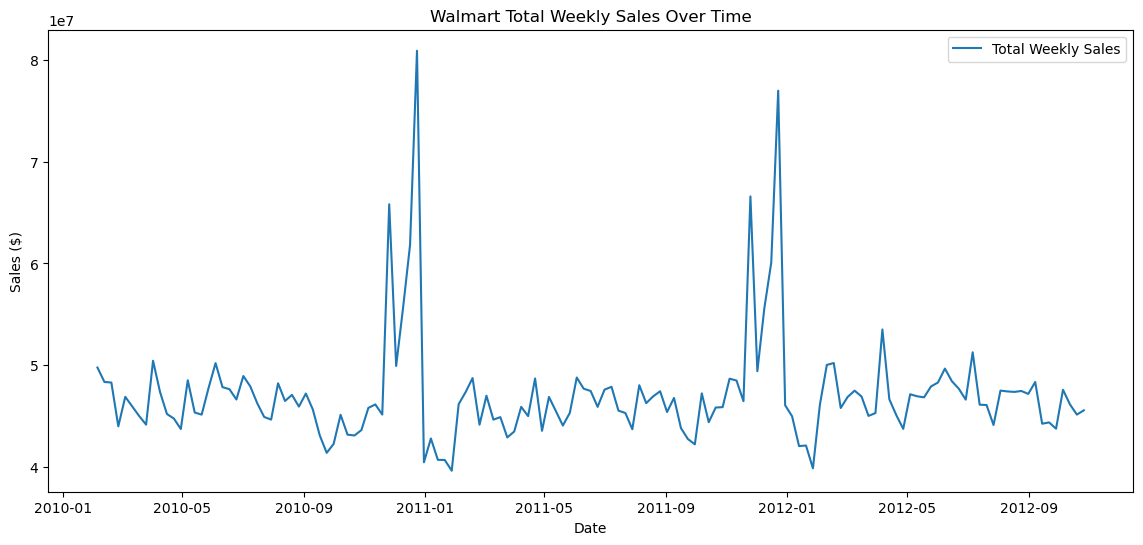

In [16]:
# === 1. Check if both holiday flags are the same ===
print((train_full["IsHoliday_x"] == train_full["IsHoliday_y"]).all())

# Drop duplicate column, rename one cleanly
train_full = train_full.drop(columns=["IsHoliday_y"])
train_full = train_full.rename(columns={"IsHoliday_x": "IsHoliday"})

# === 2. Check Date Range ===
print("Date range:", train_full["Date"].min(), "to", train_full["Date"].max())

# === 3. Aggregate Sales (for time series analysis) ===
# Total sales over time
sales_over_time = (
    train_full.groupby("Date")["Weekly_Sales"]
    .sum()
    .reset_index()
    .sort_values("Date")
)

print(sales_over_time.head())

# === 4. Quick Plot ===
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(sales_over_time["Date"], sales_over_time["Weekly_Sales"], label="Total Weekly Sales")
plt.title("Walmart Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()


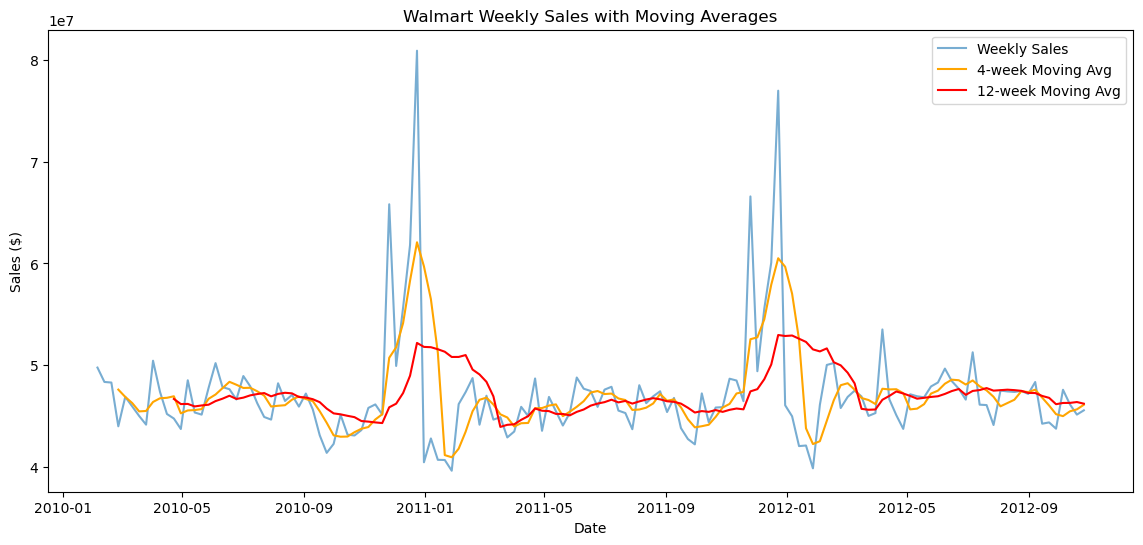

In [5]:
# Compute moving averages for smoothing
sales_over_time["MA_4"] = sales_over_time["Weekly_Sales"].rolling(window=4).mean()   # ~1 month
sales_over_time["MA_12"] = sales_over_time["Weekly_Sales"].rolling(window=12).mean() # ~3 months

plt.figure(figsize=(14,6))
plt.plot(sales_over_time["Date"], sales_over_time["Weekly_Sales"], label="Weekly Sales", alpha=0.6)
plt.plot(sales_over_time["Date"], sales_over_time["MA_4"], label="4-week Moving Avg", color="orange")
plt.plot(sales_over_time["Date"], sales_over_time["MA_12"], label="12-week Moving Avg", color="red")
plt.title("Walmart Weekly Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()


In [4]:
import pandas as pd

# Load the dataset
train = pd.read_csv("data/raw/train.csv")

# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])

# Group by Date and sum weekly sales
weekly_sales = train.groupby('Date')['Weekly_Sales'].sum().reset_index()


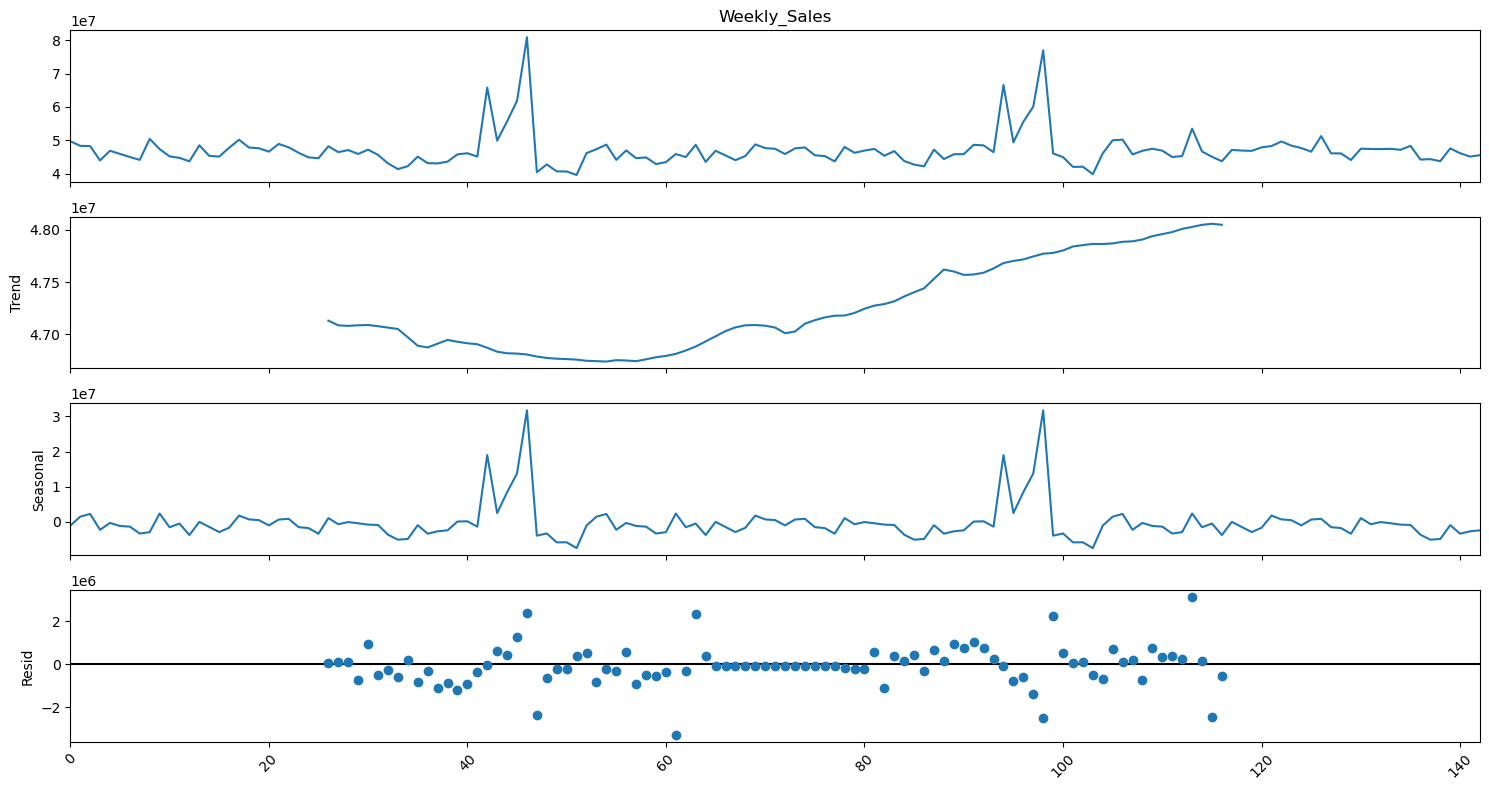

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_sales['Weekly_Sales'], model='additive', period=52)

# Plot with bigger width for readability
plt.rcParams.update({'figure.figsize': (15, 8)})  # wider figure
fig = decomposition.plot()

# Rotate x-axis labels for all subplots
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from pathlib import Path

# If train_full doesn't exist in memory, (re)build it quickly
if "train_full" not in globals():
    base_dir = Path(r"F:\Python\Projects\Elevvo Pathways\time_series_retail_sales")
    data_dir = base_dir / "data" / "raw"

    features = pd.read_csv(data_dir / "features.csv")
    stores   = pd.read_csv(data_dir / "stores.csv")
    train    = pd.read_csv(data_dir / "train.csv")

    # merge + cleanup
    train_full = (train
        .merge(features, on=["Store","Date"], how="left")
        .merge(stores,   on="Store",          how="left")
    )
    train_full["Date"] = pd.to_datetime(train_full["Date"])
    train_full = train_full.sort_values(["Store","Dept","Date"])

    # unify IsHoliday
    if "IsHoliday_y" in train_full.columns:
        train_full = train_full.rename(columns={"IsHoliday_x":"IsHoliday"}).drop(columns=["IsHoliday_y"])

print(train_full.shape, train_full.columns.tolist()[:10], "...")  # quick sanity check

(421570, 16) ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3'] ...


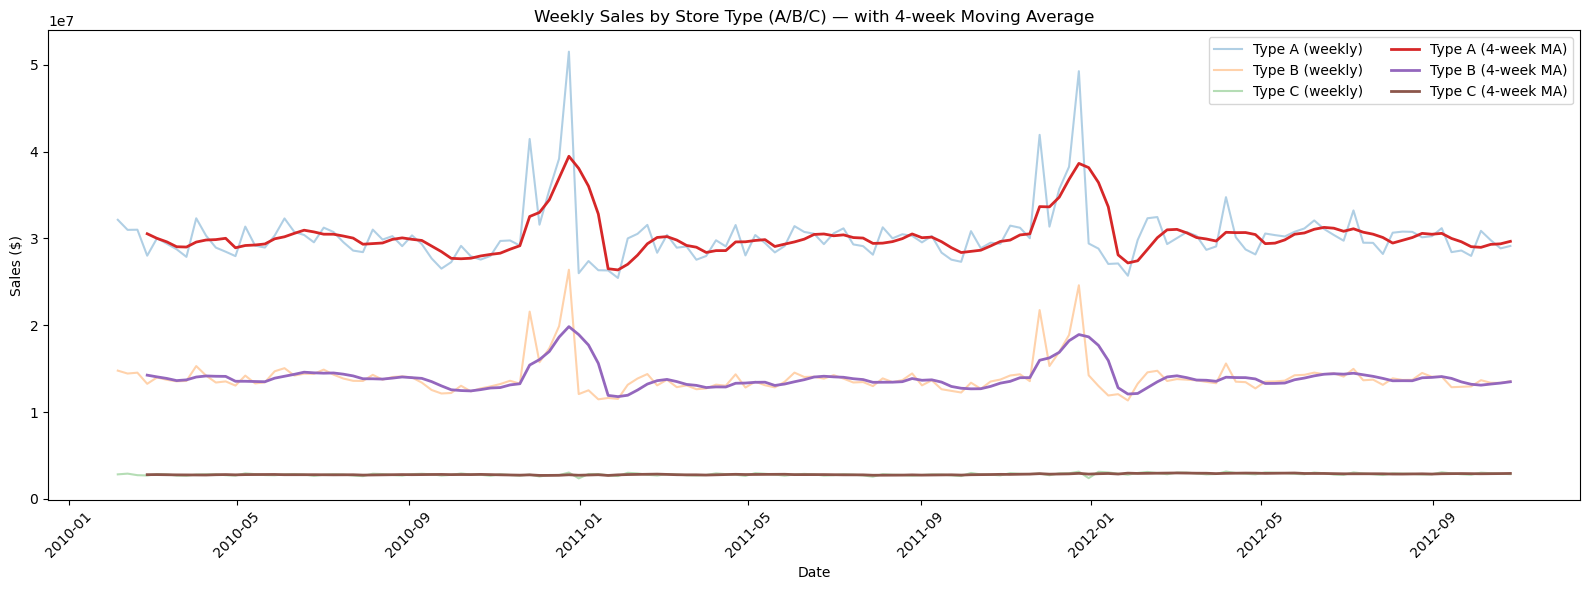

In [7]:
import matplotlib.pyplot as plt

# aggregate weekly sales by Date & Store Type
sales_by_type = (train_full
    .groupby(["Date","Type"])["Weekly_Sales"]
    .sum()
    .reset_index()
)

# pivot to wide for easier multi-line plotting
wide_type = sales_by_type.pivot(index="Date", columns="Type", values="Weekly_Sales").sort_index()

# optional smoothing to see trend better
ma_window = 4  # ~4 weeks
wide_type_ma = wide_type.rolling(window=ma_window).mean()

plt.figure(figsize=(16,6))
for col in wide_type.columns:
    plt.plot(wide_type.index, wide_type[col], alpha=0.35, label=f"Type {col} (weekly)")
for col in wide_type_ma.columns:
    plt.plot(wide_type_ma.index, wide_type_ma[col], linewidth=2, label=f"Type {col} ({ma_window}-week MA)")

plt.title("Weekly Sales by Store Type (A/B/C) — with 4-week Moving Average")
plt.xlabel("Date"); plt.ylabel("Sales ($)")
plt.legend(ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\SK Computer\AppData\Local\Temp\ipykernel_11260\3041374099.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Date","Size_Bucket"])["Weekly_Sales"]


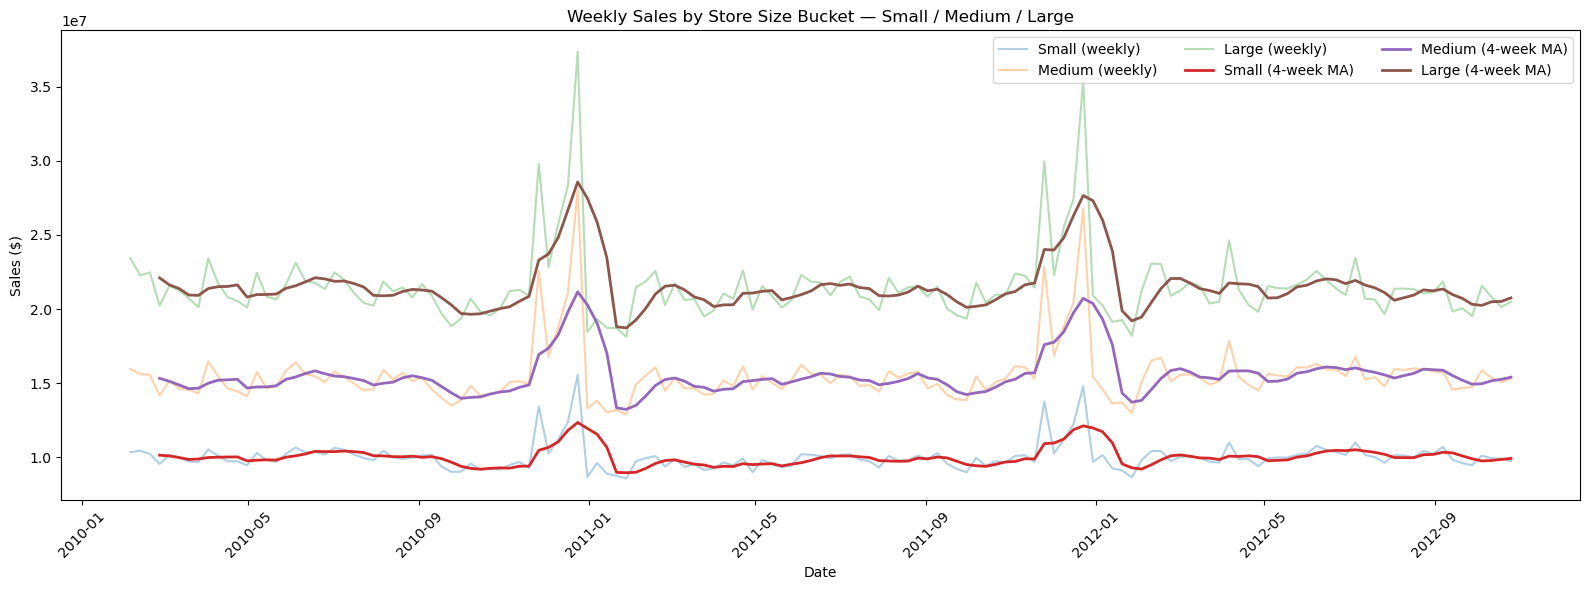

In [8]:
# create size buckets (tertiles)
train_full = train_full.copy()
train_full["Size_Bucket"] = pd.qcut(train_full["Size"], q=3, labels=["Small","Medium","Large"])

sales_by_sizebucket = (train_full
    .groupby(["Date","Size_Bucket"])["Weekly_Sales"]
    .sum()
    .reset_index()
)

wide_size = sales_by_sizebucket.pivot(index="Date", columns="Size_Bucket", values="Weekly_Sales").sort_index()
wide_size_ma = wide_size.rolling(window=4).mean()

plt.figure(figsize=(16,6))
for col in wide_size.columns:
    plt.plot(wide_size.index, wide_size[col], alpha=0.35, label=f"{col} (weekly)")
for col in wide_size_ma.columns:
    plt.plot(wide_size_ma.index, wide_size_ma[col], linewidth=2, label=f"{col} (4-week MA)")

plt.title("Weekly Sales by Store Size Bucket — Small / Medium / Large")
plt.xlabel("Date"); plt.ylabel("Sales ($)")
plt.legend(ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

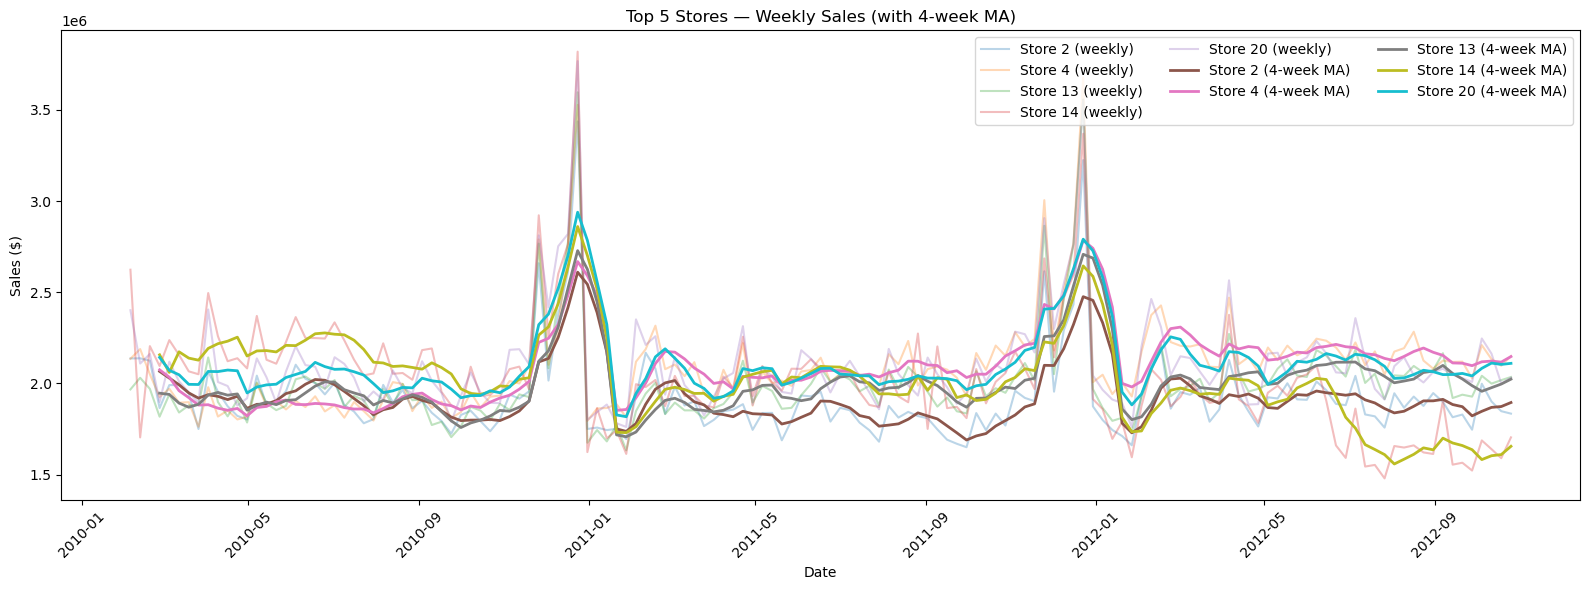

In [9]:
# find top 5 stores by total sales over the whole period
top_stores = (train_full.groupby("Store")["Weekly_Sales"].sum()
              .sort_values(ascending=False)
              .head(5)
              .index.tolist())

sales_top5 = (train_full[train_full["Store"].isin(top_stores)]
              .groupby(["Date","Store"])["Weekly_Sales"]
              .sum()
              .reset_index())

wide_top5 = sales_top5.pivot(index="Date", columns="Store", values="Weekly_Sales").sort_index()
wide_top5_ma = wide_top5.rolling(window=4).mean()

plt.figure(figsize=(16,6))
for col in wide_top5.columns:
    plt.plot(wide_top5.index, wide_top5[col], alpha=0.30, label=f"Store {col} (weekly)")
for col in wide_top5_ma.columns:
    plt.plot(wide_top5_ma.index, wide_top5_ma[col], linewidth=2, label=f"Store {col} (4-week MA)")

plt.title("Top 5 Stores — Weekly Sales (with 4-week MA)")
plt.xlabel("Date"); plt.ylabel("Sales ($)")
plt.legend(ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Load datasets
features = pd.read_csv("data/raw/features.csv")
stores = pd.read_csv("data/raw/stores.csv")
train = pd.read_csv("data/raw/train.csv")

# Convert Date to datetime
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])

# Merge datasets
merged_df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_df = merged_df.merge(stores, on='Store', how='left')

print("Final merged dataset shape:", merged_df.shape)
print(merged_df.head())


Final merged dataset shape: (421570, 16)
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A

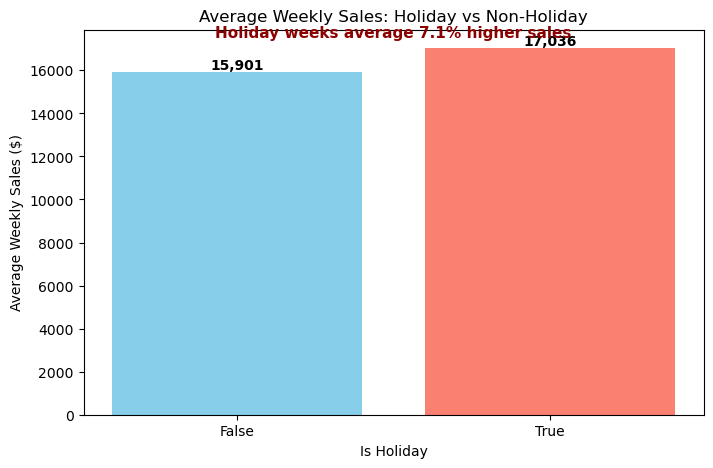

In [24]:
import matplotlib.pyplot as plt

# Compare AVERAGE weekly sales per holiday vs non-holiday
holiday_sales = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Calculate % difference (Holiday vs Non-Holiday)
holiday_val = holiday_sales.loc[holiday_sales['IsHoliday'] == True, 'Weekly_Sales'].values[0]
nonholiday_val = holiday_sales.loc[holiday_sales['IsHoliday'] == False, 'Weekly_Sales'].values[0]
pct_diff = ((holiday_val - nonholiday_val) / nonholiday_val) * 100

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(holiday_sales['IsHoliday'].astype(str),
               holiday_sales['Weekly_Sales'],
               color=['skyblue', 'salmon'])

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation for % difference
plt.text(0.5, max(holiday_val, nonholiday_val) * 1.02,
         f"Holiday weeks average {pct_diff:.1f}% {'higher' if pct_diff>0 else 'lower'} sales",
         ha='center', va='bottom', fontsize=11, color='darkred', fontweight='bold')

# Labels & title
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday")
plt.ylabel("Average Weekly Sales ($)")
plt.show()


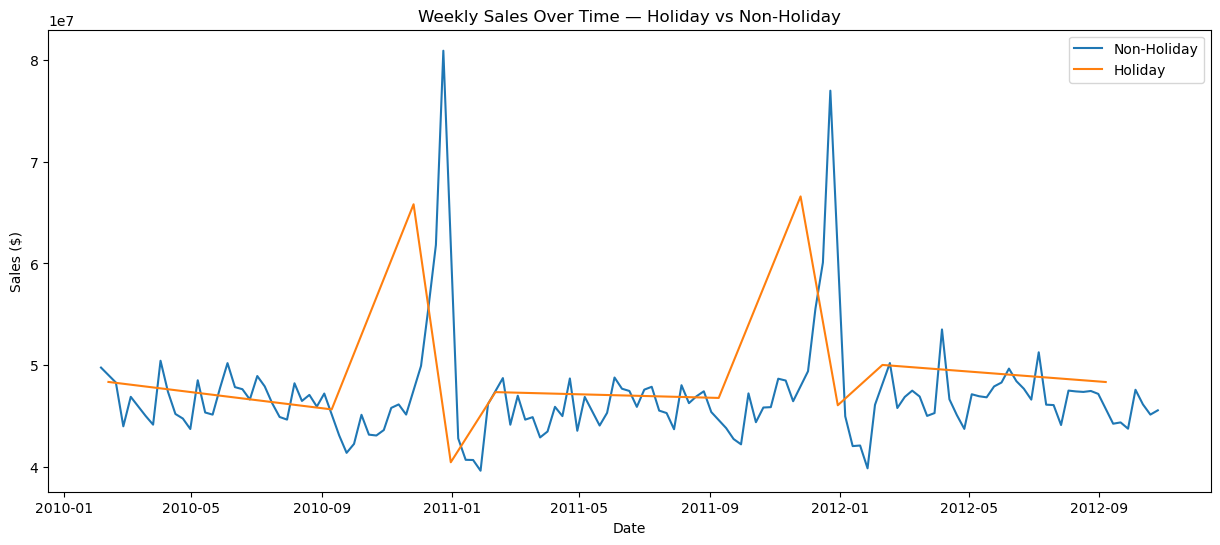

In [20]:
# Aggregate sales by date
weekly_sales = merged_df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
for is_holiday, group in weekly_sales.groupby('IsHoliday'):
    label = "Holiday" if is_holiday else "Non-Holiday"
    plt.plot(group['Date'], group['Weekly_Sales'], label=label)

plt.title('Weekly Sales Over Time — Holiday vs Non-Holiday')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


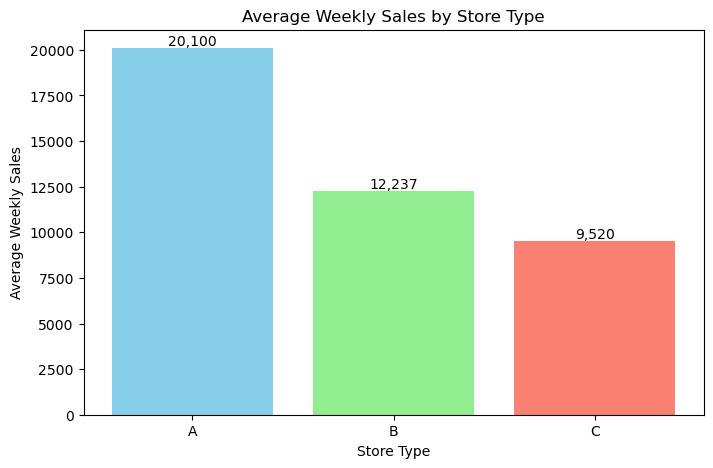

In [27]:
import matplotlib.pyplot as plt

# Group by Store Type
store_type_sales = merged_df.groupby('Type')['Weekly_Sales'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(store_type_sales['Type'], store_type_sales['Weekly_Sales'], color=['skyblue', 'lightgreen', 'salmon'])

# Add labels on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.title("Average Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.show()


C:\Users\SK Computer\AppData\Local\Temp\ipykernel_11260\128057992.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = merged_df.groupby('Region')['Weekly_Sales'].mean().reset_index()


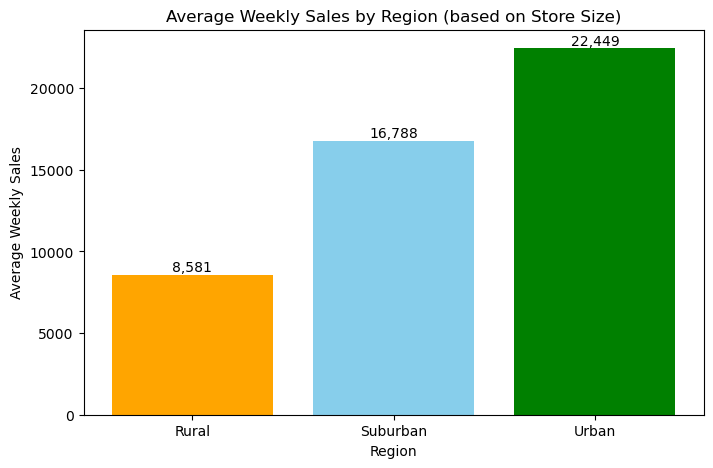

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create region categories based on Store Size quartiles
size_bins = merged_df['Size'].quantile([0, 0.25, 0.75, 1]).values
merged_df['Region'] = pd.cut(merged_df['Size'],
                          bins=size_bins,
                          labels=['Rural', 'Suburban', 'Urban'],
                          include_lowest=True)

# Group sales by Region
region_sales = merged_df.groupby('Region')['Weekly_Sales'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(region_sales['Region'], region_sales['Weekly_Sales'], color=['orange', 'skyblue', 'green'])

# Add labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.title("Average Weekly Sales by Region (based on Store Size)")
plt.xlabel("Region")
plt.ylabel("Average Weekly Sales")
plt.show()


C:\Users\SK Computer\AppData\Local\Temp\ipykernel_11260\1663859896.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_time_sales = merged_df.groupby(['Date', 'Region'])['Weekly_Sales'].sum().reset_index()


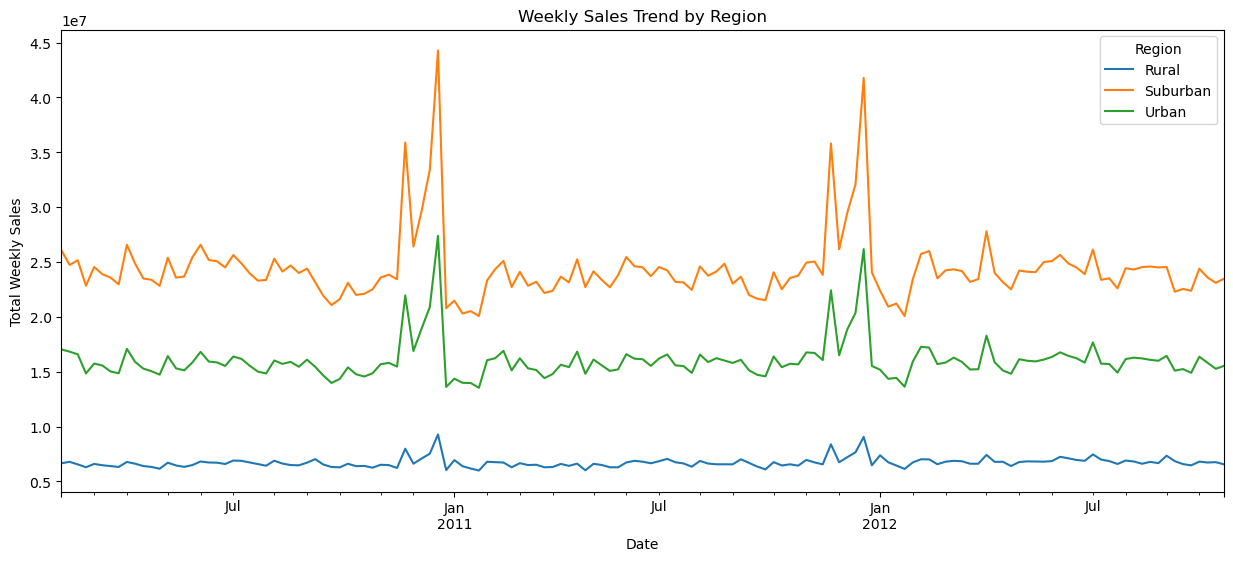

In [29]:
import matplotlib.pyplot as plt

# Aggregate weekly sales by region
region_time_sales = merged_df.groupby(['Date', 'Region'])['Weekly_Sales'].sum().reset_index()

# Pivot for plotting
pivot_region = region_time_sales.pivot(index='Date', columns='Region', values='Weekly_Sales')

# Plot
plt.figure(figsize=(15, 6))
pivot_region.plot(ax=plt.gca())

plt.title("Weekly Sales Trend by Region")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.legend(title="Region")
plt.show()


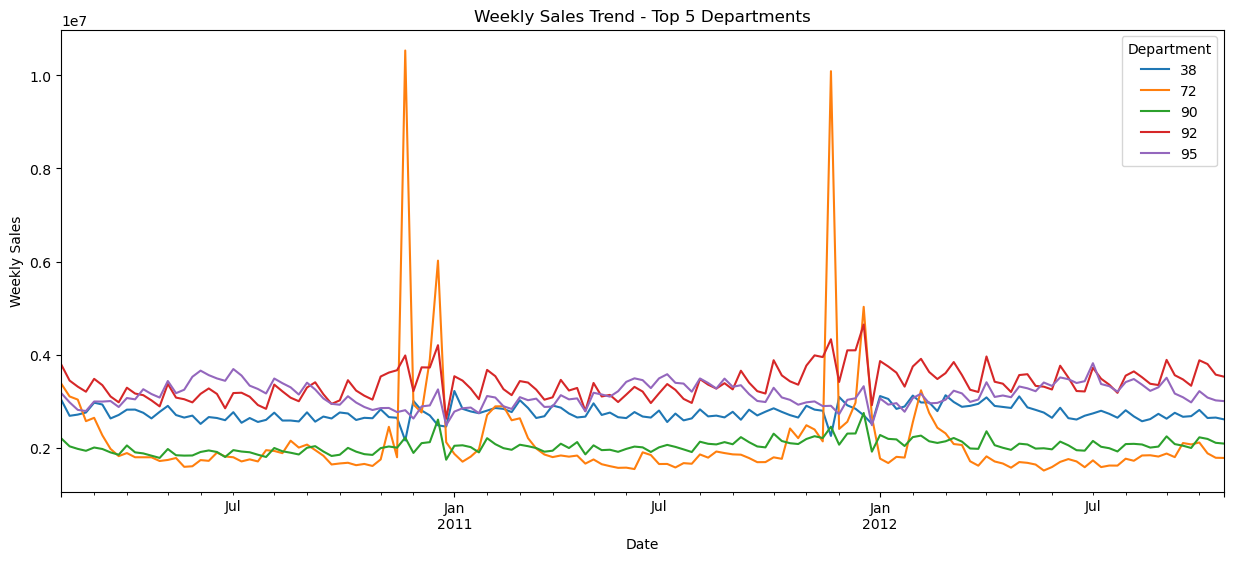

In [30]:
import matplotlib.pyplot as plt

# Aggregate sales by Dept
dept_sales = merged_df.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Find top 5 departments by total sales
top_depts = dept_sales.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index

# Filter only top 5 depts
top_dept_sales = dept_sales[dept_sales['Dept'].isin(top_depts)]

# Pivot for plotting
pivot_dept = top_dept_sales.pivot(index='Date', columns='Dept', values='Weekly_Sales')

# Plot
plt.figure(figsize=(15, 6))
pivot_dept.plot(ax=plt.gca())

plt.title("Weekly Sales Trend - Top 5 Departments")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title="Department")
plt.show()


Top Department: 92


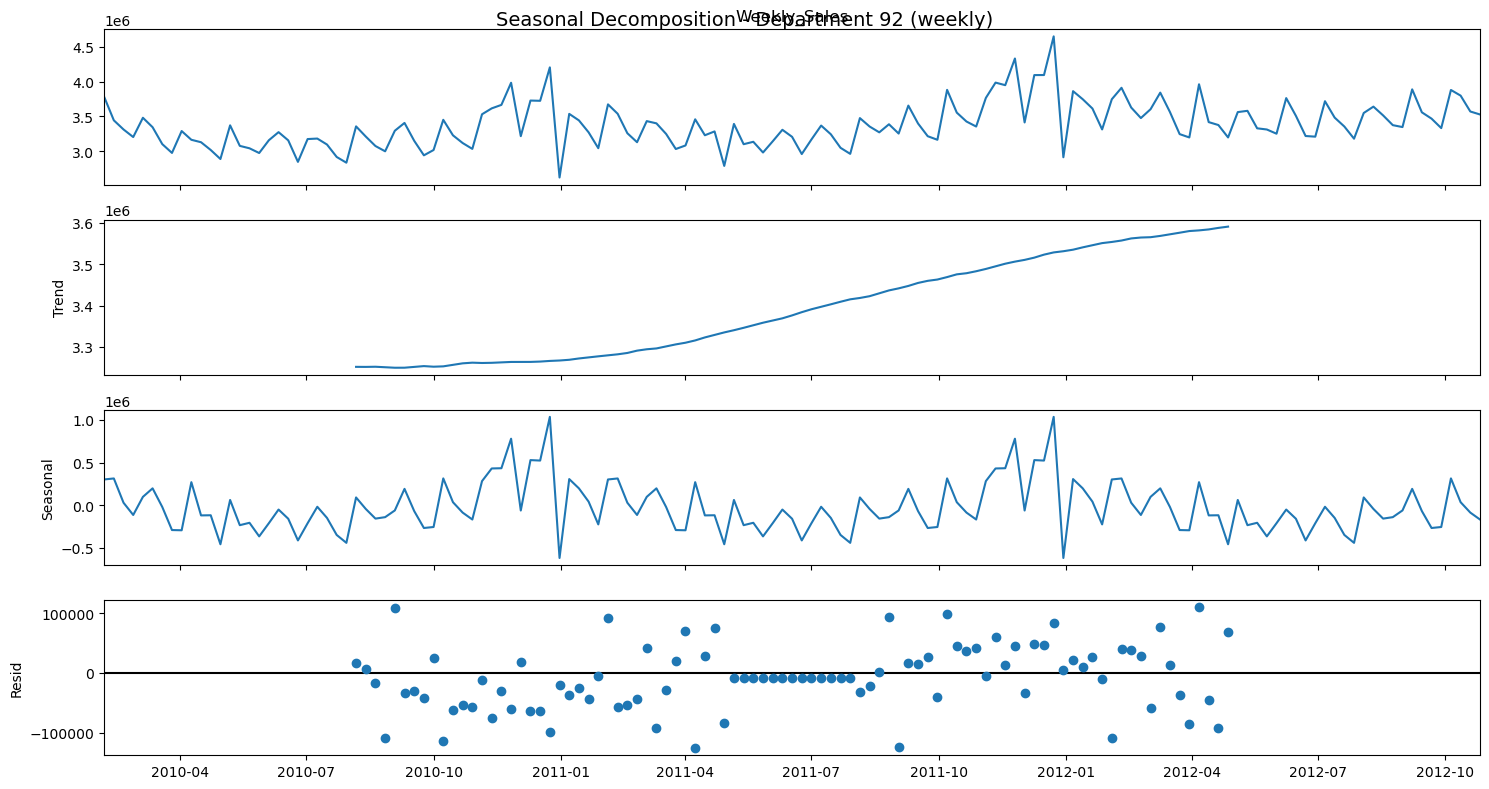

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Find the top department by total sales
top_dept = dept_sales.groupby('Dept')['Weekly_Sales'].sum().idxmax()
print("Top Department:", top_dept)

# Get sales time series for that dept
top_dept_sales = dept_sales[dept_sales['Dept'] == top_dept].set_index('Date')['Weekly_Sales']

# Ensure it's sorted by date
top_dept_sales = top_dept_sales.sort_index()

# Seasonal decomposition (weekly data → yearly seasonality ~52 weeks)
decomposition = seasonal_decompose(top_dept_sales, model='additive', period=52)

# Plot
plt.rcParams.update({'figure.figsize': (15, 8)})
decomposition.plot()
plt.suptitle(f"Seasonal Decomposition - Department {top_dept} (weekly)", fontsize=14)
plt.show()

e:\Anaconda_Software\envs\retail-timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


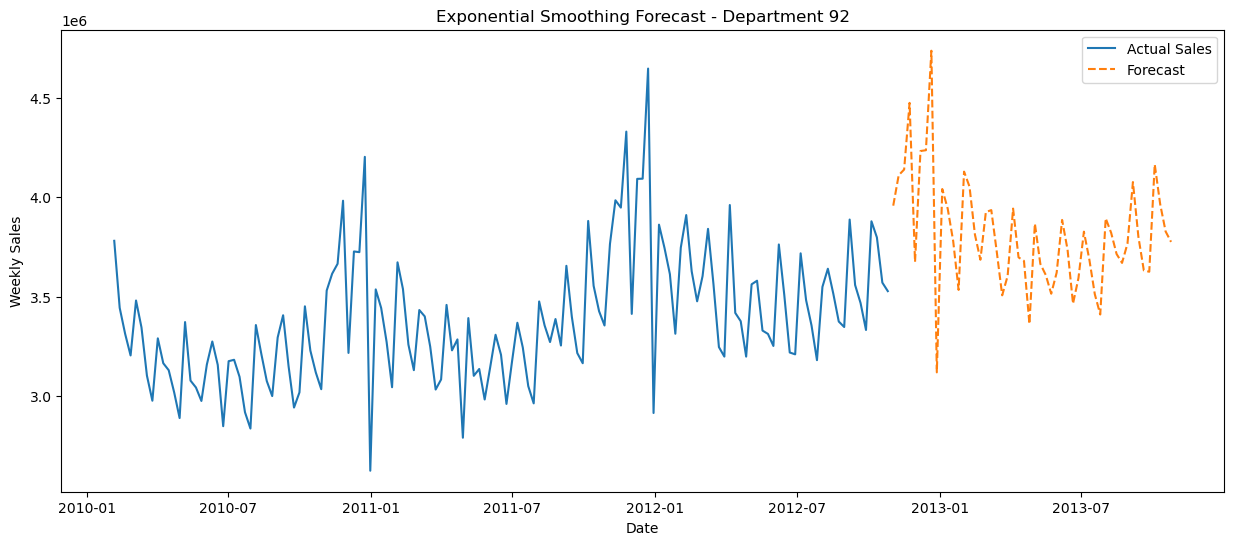

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (weekly data, yearly seasonality ~52 weeks)
model = ExponentialSmoothing(
    top_dept_sales,
    trend="add",
    seasonal="add",
    seasonal_periods=52
).fit()

# Forecast for next 52 weeks (1 year)
forecast = model.forecast(52)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(top_dept_sales.index, top_dept_sales, label="Actual Sales")
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--")
plt.title(f"Exponential Smoothing Forecast - Department {top_dept}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()
